### MMDetection 설치 및 세팅

In [ ]:
import torch
print(torch.__version__)

In [ ]:
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

In [ ]:
# https://mmcv.readthedocs.io/en/latest/get_started/installation.html에서 설치과정 참조
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html

In [ ]:
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

In [1]:
# mmdetection 설치여부 확인
from mmdet.apis import init_detector, inference_detector
import mmcv

/opt/conda/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [43]:
import pandas as pd
import numpy as np
import os

### Oxforad Pet Dataset 다운로드
* image와 annotations을 압축파일로 각각 download

In [3]:
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
!wget https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz

--2024-05-15 05:16:01--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz [following]
--2024-05-15 05:16:02--  https://thor.robots.ox.ac.uk/datasets/pets/images.tar.gz
Reusing existing connection to thor.robots.ox.ac.uk:443.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [application/octet-stream]
Saving to: 'images.tar.gz'

images.tar.gz       100%[===================>] 755.23M  27.6MB/s    in 29s     

2024-05-15 05:16:32 (25.7 MB/s) - 'images.tar.gz' saved [791918971/791918971]

--2024-05-15 05:16:33--  https://thor.robots.ox.ac.uk/~vgg/data/pets/annotations.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.

In [4]:
# data 디렉토리를 만든 후 해당 디렉토리에서 다운받은 파일 압축 풀기
!mkdir /kaggle/working/data
!tar -xvf images.tar.gz -C /kaggle/working/data
!tar -xvf annotations.tar.gz -C /kaggle/working/data

images/
images/boxer_16.jpg
images/chihuahua_165.jpg
images/pug_183.jpg
images/english_setter_1.jpg
images/chihuahua_170.jpg
images/english_cocker_spaniel_17.jpg
images/samoyed_39.jpg
images/Egyptian_Mau_62.jpg
images/samoyed_36.jpg
images/german_shorthaired_3.jpg
images/Ragdoll_183.jpg
images/British_Shorthair_64.jpg
images/american_pit_bull_terrier_57.jpg
images/beagle_120.jpg
images/american_bulldog_174.jpg
images/chihuahua_101.jpg
images/shiba_inu_136.jpg
images/Abyssinian_136.jpg
images/Siamese_201.jpg
images/Abyssinian_85.jpg
images/saint_bernard_145.jpg
images/Siamese_63.jpg
images/leonberger_164.jpg
images/Maine_Coon_126.jpg
images/samoyed_51.jpg
images/Birman_15.jpg
images/english_cocker_spaniel_181.jpg
images/english_cocker_spaniel_128.jpg
images/leonberger_133.jpg
images/english_cocker_spaniel_6.jpg
images/miniature_pinscher_119.jpg
images/american_pit_bull_terrier_27.jpg
images/Abyssinian_37.jpg
images/Bombay_91.jpg
images/Egyptian_Mau_6.jpg
images/Maine_Coon_173.jpg
images

### Image Directory와 annotation 파일 살펴보기

In [5]:
!ls -lia ./data/images/Abyss*.jpg

795507 -rwxr-xr-x 1 1001 jupyter  32362 Jun 18  2012 ./data/images/Abyssinian_1.jpg
788735 -rwxr-xr-x 1 1001 jupyter  96294 Jun 18  2012 ./data/images/Abyssinian_10.jpg
790194 -rwxr-xr-x 1 1001 jupyter 126923 Jun 18  2012 ./data/images/Abyssinian_100.jpg
792739 -rwxr-xr-x 1 1001 jupyter  49023 Jun 18  2012 ./data/images/Abyssinian_101.jpg
793815 -rwxr-xr-x 1 1001 jupyter 165505 Jun 18  2012 ./data/images/Abyssinian_102.jpg
794587 -rwxr-xr-x 1 1001 jupyter 132937 Jun 18  2012 ./data/images/Abyssinian_103.jpg
794737 -rwxr-xr-x 1 1001 jupyter  34907 Jun 18  2012 ./data/images/Abyssinian_104.jpg
793118 -rwxr-xr-x 1 1001 jupyter 141823 Jun 18  2012 ./data/images/Abyssinian_105.jpg
789275 -rwxr-xr-x 1 1001 jupyter 197092 Jun 18  2012 ./data/images/Abyssinian_106.jpg
794628 -rwxr-xr-x 1 1001 jupyter 150955 Jun 18  2012 ./data/images/Abyssinian_107.jpg
791569 -rwxr-xr-x 1 1001 jupyter 120641 Jun 18  2012 ./data/images/Abyssinian_108.jpg
793107 -rwxr-xr-x 1 1001 jupyter  13601 Jun 18  2012 ./da

In [6]:
!ls -lia ./data/images

total 792944
788645 drwxr-xr-x 2 1001 jupyter  303104 Jun 18  2012 .
788644 drwxr-xr-x 4 root root       4096 May 15 05:16 ..
795507 -rwxr-xr-x 1 1001 jupyter   32362 Jun 18  2012 Abyssinian_1.jpg
788735 -rwxr-xr-x 1 1001 jupyter   96294 Jun 18  2012 Abyssinian_10.jpg
790194 -rwxr-xr-x 1 1001 jupyter  126923 Jun 18  2012 Abyssinian_100.jpg
793117 -rw-r--r-- 1 1001 jupyter 1351002 Jun 18  2012 Abyssinian_100.mat
792739 -rwxr-xr-x 1 1001 jupyter   49023 Jun 18  2012 Abyssinian_101.jpg
789334 -rw-r--r-- 1 1001 jupyter  956090 Jun 18  2012 Abyssinian_101.mat
793815 -rwxr-xr-x 1 1001 jupyter  165505 Jun 18  2012 Abyssinian_102.jpg
793608 -rw-r--r-- 1 1001 jupyter 1611487 Jun 18  2012 Abyssinian_102.mat
794587 -rwxr-xr-x 1 1001 jupyter  132937 Jun 18  2012 Abyssinian_103.jpg
794737 -rwxr-xr-x 1 1001 jupyter   34907 Jun 18  2012 Abyssinian_104.jpg
793118 -rwxr-xr-x 1 1001 jupyter  141823 Jun 18  2012 Abyssinian_105.jpg
789275 -rwxr-xr-x 1 1001 jupyter  197092 Jun 18  2012 Abyssinian_106.jpg
7

In [7]:
!cat ./data/annotations/xmls/Abyssinian_1.xml

<annotation><folder>OXIIIT</folder><filename>Abyssinian_1.jpg</filename><source><database>OXFORD-IIIT Pet Dataset</database><annotation>OXIIIT</annotation><image>flickr</image></source><size><width>600</width><height>400</height><depth>3</depth></size><segmented>0</segmented><object><name>cat</name><pose>Frontal</pose><truncated>0</truncated><occluded>0</occluded><bndbox><xmin>333</xmin><ymin>72</ymin><xmax>425</xmax><ymax>158</ymax></bndbox><difficult>0</difficult></object></annotation>


### train, val image 및 annotation 파일 살펴보기
* train과 valid 데이터로 분류한다

In [8]:
!cd ./data/annotations; cat trainval.txt

Abyssinian_100 1 1 1
Abyssinian_101 1 1 1
Abyssinian_102 1 1 1
Abyssinian_103 1 1 1
Abyssinian_104 1 1 1
Abyssinian_105 1 1 1
Abyssinian_106 1 1 1
Abyssinian_107 1 1 1
Abyssinian_108 1 1 1
Abyssinian_109 1 1 1
Abyssinian_10 1 1 1
Abyssinian_110 1 1 1
Abyssinian_111 1 1 1
Abyssinian_112 1 1 1
Abyssinian_113 1 1 1
Abyssinian_114 1 1 1
Abyssinian_115 1 1 1
Abyssinian_116 1 1 1
Abyssinian_117 1 1 1
Abyssinian_118 1 1 1
Abyssinian_119 1 1 1
Abyssinian_11 1 1 1
Abyssinian_120 1 1 1
Abyssinian_121 1 1 1
Abyssinian_122 1 1 1
Abyssinian_123 1 1 1
Abyssinian_124 1 1 1
Abyssinian_125 1 1 1
Abyssinian_126 1 1 1
Abyssinian_127 1 1 1
Abyssinian_128 1 1 1
Abyssinian_129 1 1 1
Abyssinian_12 1 1 1
Abyssinian_130 1 1 1
Abyssinian_131 1 1 1
Abyssinian_132 1 1 1
Abyssinian_133 1 1 1
Abyssinian_134 1 1 1
Abyssinian_135 1 1 1
Abyssinian_136 1 1 1
Abyssinian_137 1 1 1
Abyssinian_138 1 1 1
Abyssinian_139 1 1 1
Abyssinian_13 1 1 1
Abyssinian_140 1 1 1
Abyssinian_141 1 1 1
Abyssinian_142 1 1 1
Abyssinian_143 1 

In [9]:
pet_df = pd.read_csv('/kaggle/working/data/annotations/trainval.txt', sep=' ', header=None, names=['img_name', 'class_id', 'etc1', 'ect2'])
pet_df.head(5)

,img_name,class_id,etc1,ect2
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1


In [10]:
pet_df['class_id'].value_counts()

class_id
1     100
2     100
3     100
4     100
5     100
6     100
7     100
9     100
10    100
11    100
16    100
15    100
14    100
18    100
19    100
20    100
17    100
21    100
25    100
24    100
22    100
36    100
31    100
32    100
26    100
28    100
27    100
29    100
30    100
37    100
35    100
34    100
33     99
8      96
13     96
23     96
12     93
Name: count, dtype: int64

In [11]:
pet_df['class_name'] = pet_df['img_name'].apply(lambda x: x[:x.rfind('_')])
pet_df.head(5)

,img_name,class_id,etc1,ect2,class_name
0,Abyssinian_100,1,1,1,Abyssinian
1,Abyssinian_101,1,1,1,Abyssinian
2,Abyssinian_102,1,1,1,Abyssinian
3,Abyssinian_103,1,1,1,Abyssinian
4,Abyssinian_104,1,1,1,Abyssinian


In [12]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(pet_df, test_size=0.1,random_state=42, shuffle=True, stratify=pet_df['class_name'])

In [13]:
train_df = train_df.sort_values(by='img_name')
val_df = val_df.sort_values(by='img_name')

In [14]:
train_df.head(5)

,img_name,class_id,etc1,ect2,class_name
10,Abyssinian_10,1,1,1,Abyssinian
0,Abyssinian_100,1,1,1,Abyssinian
1,Abyssinian_101,1,1,1,Abyssinian
2,Abyssinian_102,1,1,1,Abyssinian
3,Abyssinian_103,1,1,1,Abyssinian


In [15]:
!pwd

/kaggle/working


In [16]:
# ann_file로 주어지는 메타파일은 가급적이면 소스데이터의 가장 상단 디렉토리에 저장해야 좋다
train_df['img_name'].to_csv('/kaggle/working/data/train.txt', sep=' ', header=False, index=False)
val_df['img_name'].to_csv('/kaggle/working/data/val.txt', sep=' ', header=False, index=False)

In [17]:
pet_classes_list = pet_df['class_name'].unique().tolist()
pet_classes_list

['Abyssinian',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'Bengal',
 'Birman',
 'Bombay',
 'boxer',
 'British_Shorthair',
 'chihuahua',
 'Egyptian_Mau',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'Maine_Coon',
 'miniature_pinscher',
 'newfoundland',
 'Persian',
 'pomeranian',
 'pug',
 'Ragdoll',
 'Russian_Blue',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'Siamese',
 'Sphynx',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [18]:
!echo '#####train list#####'; cat /kaggle/working/data/train.txt

#####train list#####
Abyssinian_10
Abyssinian_100
Abyssinian_101
Abyssinian_102
Abyssinian_103
Abyssinian_104
Abyssinian_105
Abyssinian_106
Abyssinian_107
Abyssinian_108
Abyssinian_109
Abyssinian_11
Abyssinian_110
Abyssinian_111
Abyssinian_112
Abyssinian_114
Abyssinian_115
Abyssinian_116
Abyssinian_117
Abyssinian_118
Abyssinian_12
Abyssinian_120
Abyssinian_121
Abyssinian_122
Abyssinian_123
Abyssinian_124
Abyssinian_125
Abyssinian_126
Abyssinian_127
Abyssinian_128
Abyssinian_129
Abyssinian_13
Abyssinian_130
Abyssinian_131
Abyssinian_132
Abyssinian_133
Abyssinian_134
Abyssinian_135
Abyssinian_136
Abyssinian_137
Abyssinian_138
Abyssinian_139
Abyssinian_14
Abyssinian_140
Abyssinian_141
Abyssinian_142
Abyssinian_143
Abyssinian_144
Abyssinian_145
Abyssinian_146
Abyssinian_148
Abyssinian_149
Abyssinian_15
Abyssinian_150
Abyssinian_151
Abyssinian_152
Abyssinian_153
Abyssinian_154
Abyssinian_155
Abyssinian_157
Abyssinian_158
Abyssinian_159
Abyssinian_16
Abyssinian_160
Abyssinian_161
Abyssinian_

In [19]:
!echo '#####val list#####'; cat /kaggle/working/data/val.txt

#####val list#####
Abyssinian_1
Abyssinian_113
Abyssinian_119
Abyssinian_156
Abyssinian_168
Abyssinian_170
Abyssinian_179
Abyssinian_182
Abyssinian_183
Abyssinian_191
Bengal_104
Bengal_106
Bengal_107
Bengal_12
Bengal_125
Bengal_131
Bengal_137
Bengal_166
Bengal_173
Bengal_18
Birman_100
Birman_101
Birman_117
Birman_129
Birman_13
Birman_148
Birman_163
Birman_181
Birman_187
Birman_188
Bombay_107
Bombay_120
Bombay_129
Bombay_136
Bombay_150
Bombay_153
Bombay_158
Bombay_174
Bombay_184
British_Shorthair_104
British_Shorthair_105
British_Shorthair_107
British_Shorthair_141
British_Shorthair_15
British_Shorthair_154
British_Shorthair_161
British_Shorthair_166
British_Shorthair_174
British_Shorthair_201
Egyptian_Mau_101
Egyptian_Mau_107
Egyptian_Mau_110
Egyptian_Mau_123
Egyptian_Mau_132
Egyptian_Mau_146
Egyptian_Mau_176
Egyptian_Mau_185
Egyptian_Mau_190
Maine_Coon_104
Maine_Coon_107
Maine_Coon_132
Maine_Coon_134
Maine_Coon_141
Maine_Coon_142
Maine_Coon_153
Maine_Coon_170
Maine_Coon_171
Maine_Coon

### mmdetection의 middle format으로 format 변환
* CLASSES는 pet_df의 'class_name' 칼럼에 unique 데이터로 지정
* ann_file로 입력되는 메타 파일을 읽어서 개별 image 정보와 ann 정보를 dict 형태로 만들어 data_infos list에 입력
* 개별 xml을 읽어서 ann 정보를 만드는 것은 get_bboxes_from_xml() 함수를 만들어 이용
* 디버깅을 위해 CumstomDataset을 따로 만들어 미리 테스트 수행

In [20]:
'''
middle format 예시

[
    {
        'filename': 'a.jpg',
        'width': 1280,
        'height': 720,
        'ann': {
            'bboxes': <np.ndarray, float32> (n, 4),
            'labels': <np.ndarray, int64> (n, ),
            'bboxes_ignore': <np.ndarray, float32> (k, 4),
            'labels_ignore': <np.ndarray, int64> (k, ) (optional field)
        }
    },
    ...
]



'''

"\nmiddle format 예시\n\n[\n    {\n        'filename': 'a.jpg',\n        'width': 1280,\n        'height': 720,\n        'ann': {\n            'bboxes': <np.ndarray, float32> (n, 4),\n            'labels': <np.ndarray, int64> (n, ),\n            'bboxes_ignore': <np.ndarray, float32> (k, 4),\n            'labels_ignore': <np.ndarray, int64> (k, ) (optional field)\n        }\n    },\n    ...\n]\n\n\n\n"

In [44]:
import xml.etree.ElementTree as ET
import os

# 1개의 annotation 파일에서 bbox 정보 추출
def get_bboxes_from_xml(anno_dir, xml_file):
    anno_xml_file = os.path.join(anno_dir, xml_file)
    tree = ET.parse(anno_xml_file)
    root = tree.getroot()
    bbox_names = []
    bboxes = []
    
    # 파일내에 있는 모든 object element를 찾는다
    for obj in root.findall('object'):
        bbox_name = xml_file[:xml_file.rfind('_')]
        
        xmlbox = obj.find('bndbox')
        x1 = int(xmlbox.find('xmin').text)
        y1 = int(xmlbox.find('ymin').text)
        x2 = int(xmlbox.find('xmax').text)
        y2 = int(xmlbox.find('ymax').text)
        
        bbox_names.append(bbox_name)
        bboxes.append([x1, y1, x2, y2])
        
    return bbox_names, bboxes

In [46]:
# get_bboxes_from_xml()함수 테스트

get_bboxes_from_xml('/kaggle/working/data/annotations/xmls', 'Bombay_120.xml')

(['Bombay'], [[11, 11, 95, 96]])

In [75]:
import copy
import os

import mmcv
import numpy as np
import cv2

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

import xml.etree.ElementTree as ET

PET_CLASSES = pet_df['class_name'].unique().tolist()

@DATASETS.register_module(force=True)
class PetDataset(CustomDataset):
    CLASSES = PET_CLASSES

    def load_annotations(self, ann_file):
        cat2label = {k:i for i, k in enumerate(self.CLASSES)}
        image_list = mmcv.list_from_file(self.ann_file)
        # 포맷 중립 데이터를 담을 list 객체
        data_infos = []

        for image_id in image_list:
            filename = '{0:}/{1:}.jpg'.format(self.img_prefix, image_id)
            # 원본 이미지의 너비, 높이를 image를 직접 로드하여 구함. 
            image = cv2.imread(filename)
            height, width = image.shape[:2]
            # 개별 image의 annotation 정보 저장용 Dict 생성. key값 filename에는 image의 파일명만 들어감(디렉토리는 제외)
            data_info = {'filename': str(image_id) + '.jpg',
                      'width': width, 'height': height}
            # 개별 annotation XML 파일이 있는 서브 디렉토리의 prefix 변환. 
            label_prefix = self.img_prefix.replace('images', 'annotations')

            # 개별 annotation XML 파일을 1개 line 씩 읽어서 list 로드. annotation XML파일이 xmls 밑에 있음에 유의
            anno_xml_file = os.path.join(label_prefix, 'xmls/'+str(image_id)+'.xml')
            # 메타 파일에는 이름이 있으나 실제로는 존재하지 않는 XML이 있으므로 이는 제외. 
            if not os.path.exists(anno_xml_file):
                continue

            # get_bboxes_from_xml() 를 이용하여 개별 XML 파일에 있는 이미지의 모든 bbox 정보를 list 객체로 생성. 
            anno_dir = os.path.join(label_prefix, 'xmls')
            bbox_names, bboxes = get_bboxes_from_xml(anno_dir, str(image_id)+'.xml')
            
            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []

            # bbox별 Object들의 class name을 class id로 매핑. class id는 tuple(list)형의 CLASSES의 index값에 따라 설정
            for bbox_name, bbox in zip(bbox_names, bboxes):
                # 만약 bbox_name이 클래스명에 해당 되면, gt_bboxes와 gt_labels에 추가, 그렇지 않으면 gt_bboxes_ignore, gt_labels_ignore에 추가
                if bbox_name in cat2label:
                    gt_bboxes.append(bbox)
                    # gt_labels에는 class id를 입력
                    gt_labels.append(cat2label[bbox_name])
                else:
                    gt_bboxes_ignore.append(bbox)
                    gt_labels_ignore.append(-1)

                # 개별 image별 annotation 정보를 가지는 Dict 생성. 해당 Dict의 value값을 np.array형태로 bbox의 좌표와 label값으로 생성. 
                data_anno = {
                        'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                        'labels': np.array(gt_labels, dtype=np.longlong),
                        'bboxes_ignore': np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1, 4),
                        'labels_ignore': np.array(gt_labels_ignore, dtype=np.longlong)
                }

                # image에 대한 메타 정보를 가지는 data_info Dict에 'ann' key값으로 data_anno를 value로 저장. 
                data_info.update(ann=data_anno)
                # 전체 annotation 파일들에 대한 정보를 가지는 data_infos에 data_info Dict를 추가
                data_infos.append(data_info)
                #print(data_info)

        return data_infos


### Config 설정 및 COCO로 Pretrained된 모델을 download
* config 파일은 faster rcnn 50 backbone 사용
* 추가로 학습으로 생성한 모델을 외부에 저장하고, 이를 다시 불러오는 방법도 연습

In [23]:
!cd mmdetection; mkdir checkpoints
!wget -O ./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2024-05-15 05:16:59--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.20.179, 47.246.20.184, 47.246.20.181, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.20.179|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: './mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

./mmdetection/check 100%[===================>] 159.54M  6.48MB/s    in 25s     

2024-05-15 05:17:25 (6.36 MB/s) - './mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth' saved [167287506/167287506]



In [24]:
config_file = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = './mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [25]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

### 학습된 weight 파일을 kaggle/working/trained_dir 디렉토리에 저장

In [64]:
!mkdir /kaggle/working/trained_dir

In [66]:
!nvidia-smi

Wed May 15 06:25:13 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0              29W / 250W |      2MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [76]:
from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정. 
cfg.dataset_type = 'PetDataset'
cfg.data_root = '/kaggle/working/data/'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정. 
cfg.data.train.type = 'PetDataset'
cfg.data.train.data_root = '/kaggle/working/data/'
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'images'

cfg.data.val.type = 'PetDataset'
cfg.data.val.data_root = '/kaggle/working/data/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'images'

# class의 갯수 수정. / 37개 품종
cfg.model.roi_head.bbox_head.num_classes = 37
# pretrained 모델
cfg.load_from = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리로 구글 Drive 설정. 
cfg.work_dir = '/kaggle/working/trained_dir'

# 학습율 변경 환경 파라미터 설정.
# the original learning rate is set for 8-GPU training
# it's divided by 8 since we only use one GPU
cfg.optimizer.lr = 0.02 / 8 
cfg.lr_config.warmup = None
cfg.log_config.interval = 5

# epoch는 5번만 수행
# 수행 시간 이슈로 인함
cfg.runner.max_epochs = 5

# 평가 metric 설정. 
cfg.evaluation.metric = 'mAP'
# 평가 metric 수행할 epoch interval 설정. 
# epoch 5번의 interval 단위로 mAP 계산
cfg.evaluation.interval = 5
# 학습 iteration시마다 모델을 저장할 epoch interval 설정. 
cfg.checkpoint_config.interval = 5

# 학습 시 Batch size 설정(단일 GPU 별 Batch size로 설정됨)
# 개당 GPU에 batch size 단위라 8개 GPU에 해당 값을 4로 하면 total batch size는 32가 된다
# GPU memory 상황도 고려해야 한다
# 참고로 해당 coco_detection 설정에 보면 workers per gpu가 있는데 이는 CPU에서 GPU 메모리로 끌고 갈 때 몇 개를 병렬로 치냐 이런거임
cfg.data.samples_per_gpu = 4

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정. 
cfg.lr_config.policy='step'

cfg.device = 'cuda'

# We can initialize the logger for training and have a look
# at the final config used for training
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

### Train용 데이터 생성 후 Oxford Dataset 학습
* build_dataset()로 train config 설정에 따른 train용 dataset 생성
* build_detector()로 train과 config 반영해 model 생성
* train_detector()로 model 학습

In [77]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# train용 dataset 생성
datasets = [build_dataset(cfg.data.train)]

Corrupt JPEG data: premature end of data segment
/opt/conda/lib/python3.10/site-packages/mmdet-2.28.2-py3.10.egg/mmdet/datasets/custom.py:181: UserWarning: CustomDataset does not support filtering empty gt images.
  warnings.warn(


In [78]:
datasets

[
 PetDataset Train dataset with number of images 3304, and instance counts: 
 +-----------------------+-------+-------------------------+-------+-------------------------------+-------+---------------------+-------+---------------------------------+-------+
 | category              | count | category                | count | category                      | count | category            | count | category                        | count |
 +-----------------------+-------+-------------------------+-------+-------------------------------+-------+---------------------+-------+---------------------------------+-------+
 | 0 [Abyssinian]        | 89    | 1 [american_bulldog]    | 90    | 2 [american_pit_bull_terrier] | 90    | 3 [basset_hound]    | 90    | 4 [beagle]                      | 90    |
 | 5 [Bengal]            | 91    | 6 [Birman]              | 90    | 7 [Bombay]                    | 87    | 8 [boxer]           | 90    | 9 [British_Shorthair]           | 90    |
 | 10 [chihuahua]

In [83]:
%cd /kaggle/working/mmdetection

model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES

mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir))
# epochs는 config의 runner 파라미터로 지정됨. 기본 12회 
train_detector(model, datasets, cfg, distributed=False, validate=True)

'''
아래 진행과정 loss 값

loss_rpn_cls: rpn에서 obj인지 아닌지 찾아주는 loss
loss_rpn_bbox: rpn에서 bbox 찾아주는 loss
loss_cls: 분류 loss
acc: metric에 의한 평가
loss_bbox: 위치 찾는 loss

위 내용을 다 분류해준다
'''

/kaggle/working/mmdetection


2024-05-15 07:05:54,551 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
2024-05-15 07:05:55,803 - mmdet - INFO - load checkpoint from local path: checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
2024-05-15 07:05:55,953 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([38, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([38]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([148, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from 

[>>>>>>>>>>>>>                ] 169/368, 13.4 task/s, elapsed: 13s, ETA:    15s

Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 368/368, 13.6 task/s, elapsed: 27s, ETA:     0s
---------------iou_thr: 0.5---------------


2024-05-15 07:49:52,043 - mmdet - INFO - 
+----------------------------+-----+------+--------+-------+
| class                      | gts | dets | recall | ap    |
+----------------------------+-----+------+--------+-------+
| Abyssinian                 | 10  | 52   | 1.000  | 0.664 |
| american_bulldog           | 10  | 39   | 0.900  | 0.772 |
| american_pit_bull_terrier  | 10  | 50   | 1.000  | 0.900 |
| basset_hound               | 10  | 72   | 0.900  | 0.806 |
| beagle                     | 10  | 106  | 1.000  | 0.586 |
| Bengal                     | 10  | 50   | 0.900  | 0.294 |
| Birman                     | 10  | 38   | 1.000  | 0.839 |
| Bombay                     | 9   | 58   | 1.000  | 0.989 |
| boxer                      | 10  | 75   | 1.000  | 0.937 |
| British_Shorthair          | 10  | 53   | 1.000  | 0.927 |
| chihuahua                  | 10  | 78   | 1.000  | 0.840 |
| Egyptian_Mau               | 9   | 55   | 1.000  | 0.426 |
| english_cocker_spaniel     | 10  | 90   |

'\n아래 진행과정 loss 값\n\nloss_rpn_cls: rpn에서 obj인지 아닌지 찾아주는 loss\nloss_rpn_bbox: rpn에서 bbox 찾아주는 loss\nloss_cls: 분류 loss\nacc: metric에 의한 평가\nloss_bbox: 위치 찾는 loss\n\n위 내용을 다 분류해준다\n'

### 학습된 모델을 이용한 inference 수행


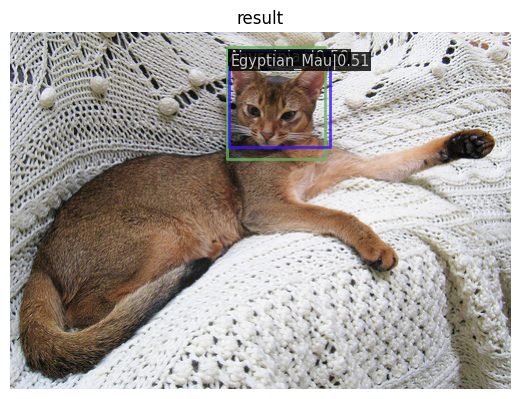

In [86]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot

img = cv2.imread('/kaggle/working/data/images/Abyssinian_88.jpg')

model.cfg = cfg

result = inference_detector(model, img)
show_result_pyplot(model, img, result, score_thr=0.5)

In [87]:
result

[array([[216.28629  ,  15.60702  , 314.256    , 127.57516  ,   0.5002904]],
       dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[2.15503372e+02, 1.85613232e+01, 3.11713562e+02, 1.20894562e+02,
         1.13035396e-01]], dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([[218.30013  ,  19.071804 , 319.06204  , 115.51828  ,   0.5124864]],
       dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype=float32),
 array([], shape=(0, 5), dtype

### Checkpoint에 저장된 model 파일을 로드하고 이를 이용한 inference

load checkpoint from local path: /kaggle/working/trained_dir/epoch_5.pth


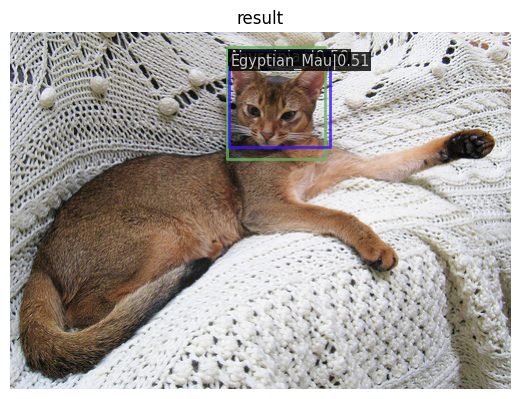

In [88]:
from mmdet.apis import show_result_pyplot

checkpoint_file = '/kaggle/working/trained_dir/epoch_5.pth'

# checkpoint로 저장된 model 파일을 이용해 모델을 생성한다
# 이때 config는 위에서 update된 config 사용
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
# BGR Image 사용
img = cv2.imread('/kaggle/working/data/images/Abyssinian_88.jpg')

result = inference_detector(model_ckpt, img)
show_result_pyplot(model_ckpt, img, result, score_thr=0.5)